# Assignment 3

##### Q1 Read the data


In [1]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
clinton = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat', sep='\s\s+',
                      names=['countyName','percentVoting', 'medianAge', \
                             'meanSavings', 'perCapitaIncome', 'percentPoverty', 'percentVeterans', \
                             'percentFemale', 'populationDensity', 'percentNursingHomes', \
                             'crimeIndex'], engine = 'python')
clinton[:10]

,countyName,percentVoting,medianAge,meanSavings,perCapitaIncome,percentPoverty,percentVeterans,percentFemale,populationDensity,percentNursingHomes,crimeIndex
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
5,"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
6,"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
7,"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
8,"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51
9,"Chilton, AL",34.19,34.0,52230,14036,18.6,9.48,51.41,47.8,3.58,296


#### </i>Q2 Predict percent Voting on all Regressors<i>

In [3]:
y, X = dmatrices('percentVoting ~ medianAge + meanSavings + perCapitaIncome + percentPoverty +\
 percentVeterans + percentFemale + populationDensity + percentNursingHomes + crimeIndex',\
                 data=clinton, return_type='dataframe')

model = sm.OLS(y, X)
result = model.fit()
print("The two worst p-values are for Median Age and Crime Index(per capita)")
print
print
print(result.summary())

The two worst p-values are for Median Age and Crime Index(per capita)


                            OLS Regression Results                            
Dep. Variable:          percentVoting   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sat, 16 Apr 2016   Prob (F-statistic):          4.12e-224
Time:                        23:26:18   Log-Likelihood:                -9576.0
No. Observations:                2704   AIC:                         1.917e+04
Df Residuals:                    2694   BIC:                         1.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

#### Q3 A formula-creating function

In [4]:
def formula(regressorList):
    formula = 'percentVoting ~'
    formula += ' ' + regressorList[0]
    if len(regressorList) >=2:
        for i in range(1, len(regressorList)):
            formula += ' ' + '+' + ' ' + regressorList[i] 
    return formula
        
regressorList = ['medianAge','meanSavings', 'perCapitaIncome', 'percentPoverty', 'percentVeterans', \
                 'percentFemale', 'populationDensity', 'percentNursingHomes', 'crimeIndex']
    
#regressorList = ['medianAge', 'meanSavings']
print(formula(regressorList))

percentVoting ~ medianAge + meanSavings + perCapitaIncome + percentPoverty + percentVeterans + percentFemale + populationDensity + percentNursingHomes + crimeIndex


#### Q4 R-squared computation function

In [5]:
def rsquared(regressorList):
    y, X = dmatrices(formula(regressorList), data=clinton, return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    return(result.rsquared)
print rsquared(regressorList)




0.326900387252


#### Q5 Find the next best regressor

In [16]:
def best_next_regressor(current_regressor_list, all_regressors_list):
    best_R2 = rsquared(current_regressor_list)
    best_set = current_regressor_list
    for i in all_regressors_list:
        if i not in current_regressor_list:
            regressor = []
            regressor.append(i)
            newSet = current_regressor_list + regressor
            newR2 = rsquared(newSet)
          
            if newR2 >= best_R2:
                best_R2 = newR2
                best_set = newSet
                best_regressor = newSet[-1]
    return best_R2, best_regressor

current_regressor_list = ['medianAge', 'perCapitaIncome', 'percentPoverty', 'percentVeterans', \
                 'percentFemale', 'populationDensity', 'percentNursingHomes']
all_regressors_list = regressorList

print 'Original R-Squared: ', rsquared(current_regressor_list)
print 'Best Next Regressor: ', best_next_regressor(current_regressor_list, all_regressors_list)

Original R-Squared:  0.317003721453
Best Next Regressor:  (0.32636121791160388, 'meanSavings')


#### Q6 Pick the k best regressors

In [19]:
def best_regressors(num_regressors, all_regressors_list):
    bestR2 = 0
    bestReg = ''
    for x in all_regressors_list:
    	x = [x]
        xR2 = rsquared(x) 
    	if xR2 >= bestR2:
    		bestR2 = xR2
    		bestReg = x
    listRegressors = bestReg
    listR2 = [bestR2]
    for i in range(num_regressors-1):
    	listRegressors.append(best_next_regressor(listRegressors, all_regressors_list)[1])
    	listR2.append(best_next_regressor(listRegressors, all_regressors_list)[0]) 
    return listRegressors, listR2
num_regressors = 5
all_regressors_list = regressorList
print best_regressors(num_regressors, all_regressors_list)



(['percentPoverty', 'populationDensity', 'percentFemale', 'meanSavings', 'percentVeterans'], [0.25103851961631962, 0.30914506632485794, 0.31924118502370502, 0.32299256887291694, 0.32485127138693681])


#### Q7 Order all regressors in the best order

In [34]:
num_regressors = len(all_regressors_list)
bestList = best_regressors(num_regressors-1, all_regressors_list)[0]
for i in all_regressors_list:
    if i not in bestList:
        bestList.append(i)
print bestList

['percentPoverty', 'populationDensity', 'percentFemale', 'meanSavings', 'percentVeterans', 'percentNursingHomes', 'perCapitaIncome', 'crimeIndex', 'medianAge']


#### Q8 Plot the R-squared values as regressors are added in the best order.

[0.25103851961631962, 0.30914506632485794, 0.31924118502370502, 0.32299256887291694, 0.32485127138693681, 0.32582492389958873, 0.32655325570492555, 0.32690038725174042, 0.32690038725174042]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


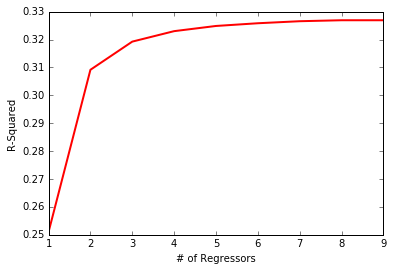

In [38]:
num_regressors = len(all_regressors_list)
best = best_regressors(num_regressors-1, all_regressors_list)[1]
best.append(result.rsquared)
print best
x = []
for z in range(num_regressors):
    x.append(z+1)
print x
plot(x, best, color='red', linewidth=2, label='haha')
xlabel('# of Regressors')
ylabel('R-Squared')